***Import Needed Libraries***

In [17]:
#Import libraries etc

import pandas as pd
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import warnings # supress warnings
warnings.filterwarnings('ignore')

***#Function to read in passed URL, read url into dataframe, fill in missing year with year return dataframe***

In [18]:
# def comb_df(url_nm,yr):
#     result = pd.DataFrame()
#     result = pd.read_html(url)[0]    
#     result['Drafted (tm/rnd/yr)'] = result['Drafted (tm/rnd/yr)'].fillna(yr) 
#     result.update(result[['40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']].fillna(0))
#     return result

# url = 'https://www.pro-football-reference.com/draft/2023-combine.htm'
# df_2023 = comb_df(url,2023)
df_2023.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Israel Abanikanda,RB,Pittsburgh,College Stats,5-10,216,0,0,0,0,0,0,2023
1,Yasir Abdullah,LB,Louisville,College Stats,6-1,237,4.47,36.5,0,129,0,0,2023
2,Devon Achane,RB,Texas A&M,College Stats,5-9,188,4.32,33.0,0,0,0,0,2023
3,Jordan Addison,WR,USC,College Stats,5-11,173,4.49,34.0,0,122,0,0,2023
4,Adetomiwa Adebawore,DE,Northwestern,College Stats,6-2,282,4.49,37.5,27,125,0,0,2023


In [19]:
df_combine = pd.DataFrame() 
df_combine = df_combine.append(df_2023)
df_combine.head(5)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Israel Abanikanda,RB,Pittsburgh,College Stats,5-10,216,0,0,0,0,0,0,2023
1,Yasir Abdullah,LB,Louisville,College Stats,6-1,237,4.47,36.5,0,129,0,0,2023
2,Devon Achane,RB,Texas A&M,College Stats,5-9,188,4.32,33.0,0,0,0,0,2023
3,Jordan Addison,WR,USC,College Stats,5-11,173,4.49,34.0,0,122,0,0,2023
4,Adetomiwa Adebawore,DE,Northwestern,College Stats,6-2,282,4.49,37.5,27,125,0,0,2023


# combine 2022 draft picks with dataframe created to hold all rows

In [20]:
url = 'https://www.pro-football-reference.com/draft/2022-combine.htm'
df_2022 = comb_df(url,2022)
df_combine = df_combine.append(df_2022)
df_combine.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Israel Abanikanda,RB,Pittsburgh,College Stats,5-10,216,0,0,0,0,0,0,2023
1,Yasir Abdullah,LB,Louisville,College Stats,6-1,237,4.47,36.5,0,129,0,0,2023
2,Devon Achane,RB,Texas A&M,College Stats,5-9,188,4.32,33.0,0,0,0,0,2023
3,Jordan Addison,WR,USC,College Stats,5-11,173,4.49,34.0,0,122,0,0,2023
4,Adetomiwa Adebawore,DE,Northwestern,College Stats,6-2,282,4.49,37.5,27,125,0,0,2023


**Create Dataframe to hold all rows from NFL Combines 2015 thru 2022**

In [21]:
df_combine = df_combine[df_combine['Pos'] != 'Pos']

In [22]:
df_combine.tail(5)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
325,Devonte Wyatt,DT,Georgia,College Stats,6-3,304,4.77,29.0,0,111,0,0,Green Bay Packers / 1st / 28th pick / 2022
326,Jalen Wydermyer,TE,Texas A&M,College Stats,6-4,255,0,0,0,0,0,0,2022
327,Cade York,K,LSU,College Stats,6-1,206,0,0,12,0,0,0,Cleveland Browns / 4th / 124th pick / 2022
328,Nick Zakelj,OT,Fordham,NaN,6-6,316,5.13,28.5,27,110,7.75,4.71,San Francisco 49ers / 6th / 187th pick / 2022
329,Bailey Zappe,QB,Western Kentucky,College Stats,6-1,215,4.88,30.0,0,109,7.19,4.40,New England Patriots / 4th / 137th pick / 2022


**Import 2021 combine results.** 
***Note: 2021 Combine was cancelled due to pandemic. Results of players pro days was used***

In [23]:
# 2021 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2019-combine.htm'
df_2021 = comb_df(url,2021)
df_2021.head(5)


df_combine = df_combine.append(df_2021)

In [24]:
df_2021 = df_2021[df_2021['Pos'] != 'Pos']

In [25]:
df_2021.head(5)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Johnathan Abram,S,Mississippi State,College Stats,5-11,205,4.45,0,0,116,0,0,Oakland Raiders / 1st / 27th pick / 2019
1,Paul Adams,OT,Missouri,College Stats,6-6,317,5.18,27.0,16,103,7.68,4.74,2021
2,Nasir Adderley,S,Delaware,NaN,6-0,206,0,0,0,0,0,0,Los Angeles Chargers / 2nd / 60th pick / 2019
3,Azeez Al-Shaair,LB,Florida Atlantic,College Stats,6-1,234,0,0,16,0,0,0,2021
4,Otaro Alaka,LB,Texas A&M,College Stats,6-3,239,4.82,36.0,20,131,0,0,2021


In [26]:
df_combine = df_combine.append(df_2021)

**Import 2020 combine results.**

In [27]:
# 2020 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2019-combine.htm'
df_2020 = comb_df(url,2020)
df_2020 = df_2020[df_2020['Pos'] != 'Pos']
df_combine = df_combine.append(df_2020)

***Import 2019 combine results***

In [28]:
# 2019 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2019-combine.htm'
df_2019 = comb_df(url,2019)
df_2019 = df_2019[df_2019['Pos'] != 'Pos']
df_combine = df_combine.append(df_2019)

***Import 2018 combine results and append to combine dataframe***

In [29]:
# 2018 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2018-combine.htm'
df_2018 = comb_df(url,2018)
df_2018 = df_2018[df_2018['Pos'] != 'Pos']
df_combine = df_combine.append(df_2018)


***Import 2017 combine results and append to combine dataframe***

In [30]:
# 2017 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2017-combine.htm'
df_2017 = comb_df(url,2017)
df_2017 = df_2017[df_2017['Pos'] != 'Pos']
df_combine = df_combine.append(df_2017)

***Import 2016 combine results and append to combine dataframe***

In [31]:
# 2016 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2016-combine.htm'
df_2016 = comb_df(url,2016)
df_2016 = df_2016[df_2016['Pos'] != 'Pos']
df_combine = df_combine.append(df_2016)

**Import 2015 combine results and append to combine dataframe**

In [32]:
# 2015 NFL Combine Results
url = 'https://www.pro-football-reference.com/draft/2015-combine.htm'
df_2015 = comb_df(url,2015)
df_2015 = df_2015[df_2015['Pos'] != 'Pos']
df_combine = df_combine.append(df_2015)

**Encode school name as a number using Ordinal encoder function**

In [33]:
enc = OrdinalEncoder()
enc.fit(df_combine[['School']])
df_combine[['School']] = enc.transform(df_combine[['School']])

**Split column 'Drafted (tm/rnd/yr)' into 4 columns - Team, Round, Pick and Year**

In [34]:
df_combine[['Team', 'Round','Pick', 'Year']] = df_combine['Drafted (tm/rnd/yr)'].str.split('/', expand=True)
df_combine = df_combine.drop(columns=['Drafted (tm/rnd/yr)'],)

**Drop suffix on round number leaving just round player drafted in.  0 = not drafted.**

In [35]:

char_to_replace = {'nd ' : '', 'st ':'','rd ':'','th ':'', 'pick ':''}
for key, value in char_to_replace.items():
    df_combine['Pick'] = df_combine['Pick'].str.replace(key,value)  
for key, value in char_to_replace.items():
    df_combine['Round'] = df_combine['Round'].str.replace(key,value)
df_combine.update(df_combine[['Team']].fillna('None'))   
df_combine.update(df_combine[['Round','Pick','Year']].fillna(0))

**Remove any title rows interspersed in dataframe**

In [36]:
df_combine = df_combine[df_combine['Pos'] != 'Pos']

**Convert positions from character to numeric**

In [37]:
conditions = [
    (df_combine['Pos'] == 'S'),
    (df_combine['Pos'] == 'OT'),
    (df_combine['Pos'] == 'LB'),
    (df_combine['Pos'] == 'EDGE'),
    (df_combine['Pos'] == 'DL'),
    (df_combine['Pos'] == 'RB'),
    (df_combine['Pos'] == 'WR'),
    (df_combine['Pos'] == 'CB'),
    (df_combine['Pos'] == 'P'),
    (df_combine['Pos'] == 'OL'),
    (df_combine['Pos'] == 'TE'),
    (df_combine['Pos'] == 'QB'),
    (df_combine['Pos'] == 'K'),
    (df_combine['Pos'] == 'LS'),
    (df_combine['Pos'] == 'FB'),
    (df_combine['Pos'] == 'C'),
    (df_combine['Pos'] == 'DE'),
    (df_combine['Pos'] == 'DT'),
    (df_combine['Pos'] == 'ILB'),
    (df_combine['Pos'] == 'OLB'),
    (df_combine['Pos'] == 'OG'),
    (df_combine['Pos'] == 'DB')
]
choices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
df_combine['Pos'] = np.select(conditions,choices, default=0)

**Split Height into 2 separate columns 1 for feet 1 for inches so 6-2 becomes 2 separate columns 6 2**

In [38]:
df_combine[['Feet', 'Inches']] = df_combine['Ht'].str.split('-', expand=True)
df_combine["Feet"] = pd.to_numeric(df_combine["Feet"])
df_combine["Inches"] = pd.to_numeric(df_combine["Inches"])

**Multiply feet by 12 to convert feet to inches. Add feet converted to inches to inches to get height in inches**

In [39]:
df_combine["Feet"] = df_combine["Feet"] * 12
df_combine['Ht'] = df_combine["Feet"] + df_combine["Inches"]
df_combine = df_combine.drop(columns=['Feet','Inches'])

**Convert all columns to numeric and fill in any missing values with 0**

In [40]:
df_combine["Pos"] = pd.to_numeric(df_combine["Pos"])
df_combine["Wt"] = pd.to_numeric(df_combine["Wt"])
df_combine["40yd"] = pd.to_numeric(df_combine["40yd"])
df_combine["Vertical"] = pd.to_numeric(df_combine["Vertical"])
df_combine["Bench"] = pd.to_numeric(df_combine["Bench"])
df_combine["Broad Jump"] = pd.to_numeric(df_combine["Broad Jump"])
df_combine["3Cone"] = pd.to_numeric(df_combine["3Cone"])
df_combine["Shuttle"] = pd.to_numeric(df_combine["Shuttle"])
df_combine["Round"] = pd.to_numeric(df_combine["Round"])
df_combine["Pick"] = pd.to_numeric(df_combine["Pick"])
df_combine["Year"] = pd.to_numeric(df_combine["Year"])
df_combine = df_combine.fillna(0)

**populate drafted column with 0 where Round = 0 otherwise populate it with 1 if it has a value greater than 0.**
**drop columns

In [41]:
df_combine['Drafted'] = np.where(df_combine['Round']!= 0, 1, 0)
df_combine1 = df_combine
df_combine1 = df_combine1.drop(columns=['Player','College','Team','Round','Year','Pick'])

**Describe dataframe of 2015 thru 2021 draft**

In [42]:
#describe dataframe of 2015 thru 2021 draft
df_combine1.describe()

,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted
count,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000
mean,8.493039,126.158596,74.018160,241.836259,3.852352,25.705357,12.848668,89.994855,3.954897,2.537561,0.590799
std,5.706672,73.396086,2.602481,44.825245,1.875964,14.266833,10.590302,49.824132,3.638804,2.190482,0.491761
min,1.000000,0.000000,65.000000,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,66.000000,72.000000,205.000000,4.420000,25.000000,0.000000,97.000000,0.000000,0.000000,0.000000
50%,7.000000,120.000000,74.000000,230.000000,4.590000,31.500000,15.000000,115.000000,6.810000,4.140000,1.000000
75%,11.000000,198.250000,76.000000,278.250000,4.870000,35.000000,21.000000,121.000000,7.210000,4.400000,1.000000
max,22.000000,249.000000,82.000000,384.000000,5.850000,45.000000,42.000000,147.000000,8.720000,5.380000,1.000000


**Create Correlation Matrix of fields** 

In [43]:
corrM = df_combine1.corr()
corrM = corrM.sort_values(by ='Pos',ascending=True)
print(corrM)

                 Pos    School        Ht        Wt      40yd  Vertical  \
Broad Jump -0.044213  0.053828 -0.054988 -0.101551  0.471218  0.862780   
Vertical   -0.041734  0.037340 -0.084989 -0.145540  0.468963  1.000000   
Drafted    -0.007165  0.014247  0.032067  0.085726  0.118650  0.101696   
School      0.011652  1.000000  0.025518  0.013900  0.063470  0.037340   
Bench       0.019725  0.053829  0.100249  0.321691  0.166221  0.142608   
Shuttle     0.076004  0.063228  0.173553  0.209715  0.398940  0.497265   
3Cone       0.077447  0.050140  0.167197  0.201564  0.381759  0.464731   
40yd        0.112659  0.063470  0.038021  0.097064  1.000000  0.468963   
Ht          0.141321  0.025518  1.000000  0.705810  0.038021 -0.084989   
Wt          0.212061  0.013900  0.705810  1.000000  0.097064 -0.145540   
Pos         1.000000  0.011652  0.141321  0.212061  0.112659 -0.041734   

               Bench  Broad Jump     3Cone   Shuttle   Drafted  
Broad Jump  0.159335    1.000000  0.486419  0.

**Create Correlation Heat Map**

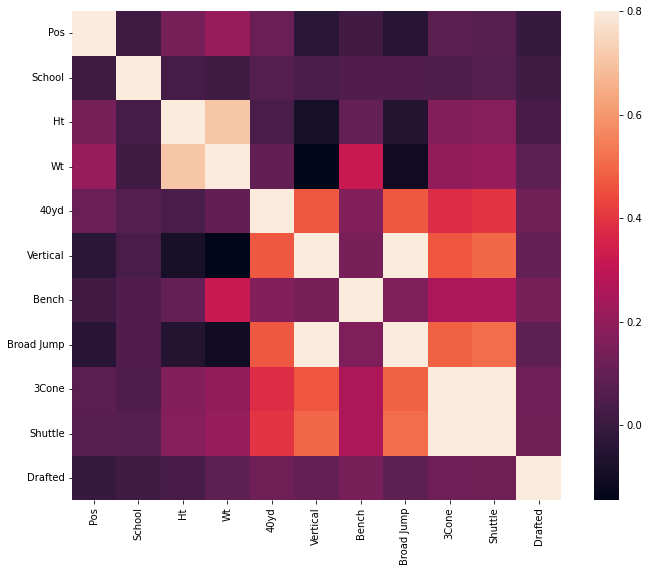

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df_combine1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,  square=True);

**Calculate Covariance values**

In [45]:
covar1 = df_combine1.cov()
covar1 = covar1.sort_values(by ='Drafted',ascending=False)
print(covar1)

                  Pos       School         Ht           Wt       40yd  \
Broad Jump -12.571183   196.843989  -7.130091  -226.802538  44.043945   
Wt          54.245757    45.732001  82.337519  2009.302578   8.162205   
Bench        1.192104    41.840235   2.762967   152.710908   3.302309   
Vertical    -3.397828    39.099725  -3.155562   -93.075054  12.551358   
School       4.880608  5386.985436   4.874201    45.732001   8.739015   
Drafted     -0.020106     0.514206   0.041039     1.889683   0.109458   
3Cone        1.608230    13.391037   1.583344    32.877148   2.605986   
Shuttle      0.950077    10.165373   0.989372    20.591708   1.639348   
40yd         1.206073     8.739015   0.185625     8.162205   3.519240   
Ht           2.098825     4.874201   6.772907    82.337519   0.185625   
Pos         32.566104     4.880608   2.098825    54.245757   1.206073   

              Vertical       Bench   Broad Jump      3Cone    Shuttle  \
Broad Jump  613.292156   84.073396  2482.444115  8

**Create Boxplots of variables with top covariances**

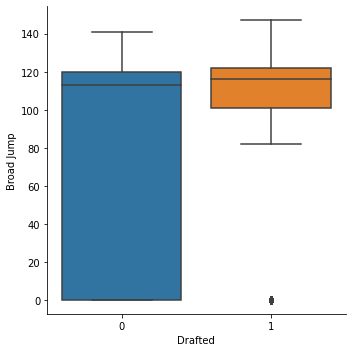

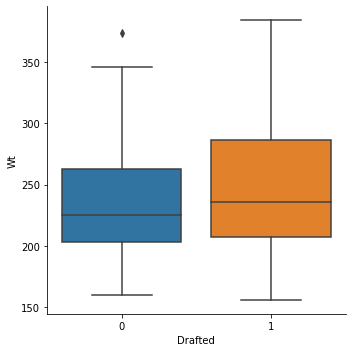

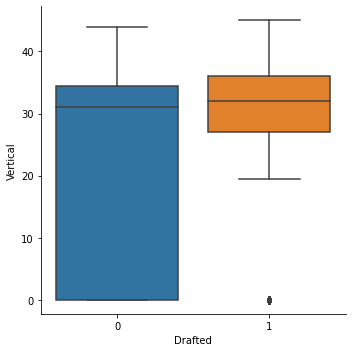

In [46]:
sns.catplot(x="Drafted", y="Broad Jump",  kind="box",data=df_combine1)
sns.catplot(x="Drafted", y="Wt",  kind="box",data=df_combine1)
sns.catplot(x="Drafted", y="Vertical",  kind="box",data=df_combine1);

**Create skewness and curtosis plots**

Skewness: -0.369505
Kurtosis: -1.864595


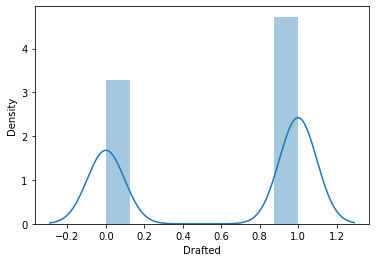

In [47]:
df_combine1.to_csv('drafted.csv')
sns.distplot(df_combine1['Drafted']);
print("Skewness: %f" % df_combine1['Drafted'].skew())
print("Kurtosis: %f" % df_combine1['Drafted'].kurt());

**Histogram of Drafted vs Undrafted**

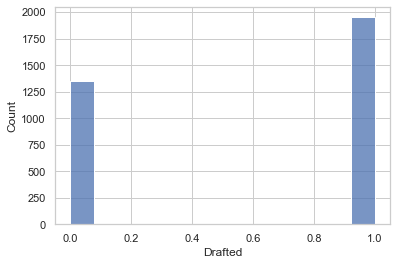

In [48]:
sns.set_theme(style="whitegrid")
sns.histplot(df_combine1['Drafted']);

**Create feature and targets**

In [49]:
feature_cols  = ['Pos','School','Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']
target = df_combine1['Drafted']
X = df_combine1[feature_cols]
y = target

**Split into training and test**

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**scale train and test**

In [51]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test) 


**Perform Logistic Regression to predict whether player will be drafted or not**

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain,y_train)
y_pred=logreg.predict(xtest)

**Confusion Matrix Calculation**

In [53]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 92, 231],
       [ 75, 428]], dtype=int64)

In [54]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,92,231,323
1,75,428,503
All,167,659,826


**Create confusion matrix for predicted**

In [55]:
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

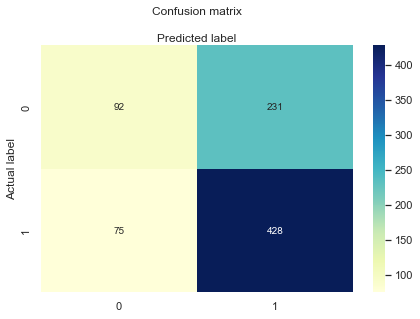

In [56]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Print Accuracy, Precision and Recall**

In [57]:
# metrics.precision_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.28      0.38       323
           1       0.65      0.85      0.74       503

    accuracy                           0.63       826
   macro avg       0.60      0.57      0.56       826
weighted avg       0.61      0.63      0.60       826



**Calculate and plot AUC**

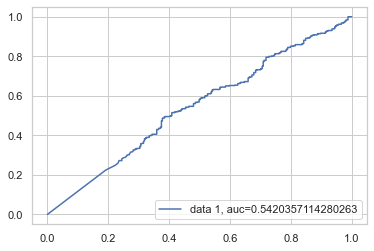

In [58]:
#plot AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Use Neural Net to calculate whether player is drafted or not**

In [59]:
# Importing Keras libraries
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding input layer 8 inputs
classifier.add(Dense(8, activation = 'relu'))

# Adding hidden layer 1st hidden layer rule of thumb take # of inputs add outputs and divide by 2
# 8 inputs + 2 outputs (1,0) /2 = 5
# more hidden layers longer processing time
classifier.add(Dense(5, activation = 'relu'))

classifier.add(Dense(2, activation = 'relu'))


# Adding output layer Binary so only one sigmoid used to classify data into 2 types (from logistic regression)
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling ANN Algorithm
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN Algorithm to Training set
classifier.fit(xtrain, y_train, batch_size = 10, epochs = 150)

Epoch 1/150
248/248 [==============================] - 1s 1ms/step - loss: 0.6779 - accuracy: 0.5799
Epoch 2/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5775
Epoch 3/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.5831
Epoch 4/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.5839
Epoch 5/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5847
Epoch 6/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5932
Epoch 7/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6069
Epoch 8/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6057
Epoch 9/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6065
Epoch 10/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6517 - accura

248/248 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.6360
Epoch 82/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.6368
Epoch 83/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.6360
Epoch 84/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.6356
Epoch 85/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.6368
Epoch 86/150
248/248 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6388
Epoch 87/150
248/248 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6384
Epoch 88/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.6364
Epoch 89/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6433
Epoch 90/150
248/248 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 

**Predict drafted**

In [60]:
# # Predicting y_test using X_test 
# y_pred = classifier.predict(xtest)
_, accuracy = classifier.evaluate(xtest, y_test)
print('Accuracy: %.2f' % (accuracy*100))

26/26 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.5726
Accuracy: 57.26


**Predict using K Nearest Neighbors**

In [61]:
# predict round for drafted players
df_round_df = df_combine.loc[df_combine['Round'] > 0]
feature_cols  = ['Pos','School','Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone']
target = df_round_df['Round']
X = df_round_df[feature_cols]
y = target


**Train test split**

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

**Feature Scaling**

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

**Look at the error rate for different k values**

In [65]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.8359858359393246
RMSE value for k=  2 is: 1.6924686490086716
RMSE value for k=  3 is: 1.636903903853807
RMSE value for k=  4 is: 1.6990669923523554
RMSE value for k=  5 is: 1.7430901214095325
RMSE value for k=  6 is: 1.7939860381526587
RMSE value for k=  7 is: 1.8000701716289413
RMSE value for k=  8 is: 1.7978145478156515
RMSE value for k=  9 is: 1.8159791584013039
RMSE value for k=  10 is: 1.8182788860394545
RMSE value for k=  11 is: 1.81391035102524
RMSE value for k=  12 is: 1.8237708843777982
RMSE value for k=  13 is: 1.8377200960867273
RMSE value for k=  14 is: 1.8414927555280383
RMSE value for k=  15 is: 1.84980817419805
RMSE value for k=  16 is: 1.8505465296608723
RMSE value for k=  17 is: 1.8438906536906234
RMSE value for k=  18 is: 1.8409449575282442
RMSE value for k=  19 is: 1.8299659627707767
RMSE value for k=  20 is: 1.8270838224114534


**Plot RMSE against K values**

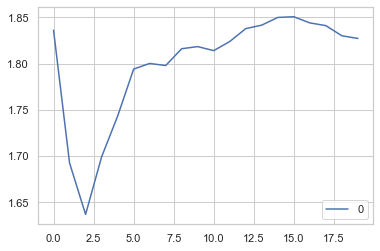

In [66]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot();

**Use GridsearchCV to find best value**

In [67]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [69]:
accuracy = knn.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 31.71


**Linear Regression**

In [70]:
feature_cols  = ['Pos','School','Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']
target = df_combine1['Drafted']
X = df_combine1[feature_cols]
y = target

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

**Create model using Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train);


**Calculate Accuracy of Random Forest**

In [74]:
y_pred=clf.predict(X_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (Accuracy*100))

Accuracy: 77.36


In [75]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.23
Coefficient of determination: 0.05


In [76]:
import seaborn as sn

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.72      0.69      0.70       323
           1       0.81      0.83      0.82       503

    accuracy                           0.77       826
   macro avg       0.76      0.76      0.76       826
weighted avg       0.77      0.77      0.77       826



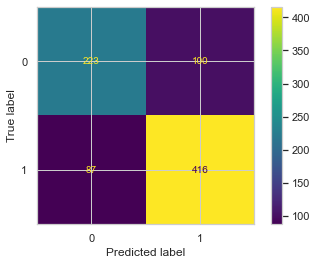

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
## Display the visualization of the Confusion Matrix.
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred);
print(metrics.classification_report(y_test, y_pred))

**So it appears that Random Forest is the best method to use in this cse to predict whether a player will be drafted or not based on their NFL Scouting Combine Measurements.**